In [2]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(10)

# The Joint Distribution and Basic Computations
Let $X,Y$ be discrete random variables that take on $N,M$ values respectively. Then the joint distribution $P(X,Y)$ captures everything we want to know
about them. We can think of this an an $N \times M$ matrix where $P_{ij}$ is the number of times $X = x_i, Y = y_i$

In [49]:
# Two discrete random variables
N = 10
X = np.random.choice(2, N, p = [0.3,0.7]) 
Y = np.random.choice(3, N, p = [0.4,0.4,0.2])

(array([1, 1, 1, 1, 0, 1, 0, 1, 1, 1]), array([0, 1, 0, 1, 0, 0, 2, 1, 2, 1]))

In [58]:
X,Y

(array([1, 1, 1, 1, 0, 1, 0, 1, 1, 1]), array([0, 1, 0, 1, 0, 0, 2, 1, 2, 1]))

In [69]:
def make_joint_dist(x_size,y_size, x_obs, y_obs):
    n,m = x_size,y_size
    trials = len(x_obs)
    joint = np.zeros((n,m))
    for i in range(n):
        for j in range(m):
            joint[i,j] = np.sum((x_obs == i)&(y_obs == j))
    return joint/trials
joint = make_joint_dist(2,3,X,Y)
joint

array([[0.1, 0. , 0.1],
       [0.3, 0.4, 0.1]])

We can capture all the information we want because of the `sum` and `product` rules. To get information about $X=x_i$ or $Y=y_j$ we simply sum over the column or row $$P(X = x_i) = \sum_{j=1}^M P(X = x_i, Y = y_j)$$
This is referred to as marginalization. Conditionals are given by $$P(Y=y_j|X = X_i) = P_{ij}/\sum_{j=1}^N P_{ij}$$. We can also use this to answer queries like $P(X,Y)$ using conditionals instead
$$P(X,Y) = P(Y|X)P(X)$$

In [75]:
#P(X = 1 ) should be close to 0.7 from either directly or the joint
print(f'P(X = 1) = {np.sum(X == 1)}')
# for x sum across row i
print(f'P(X = 1) = {np.sum(joint[1])}')

#P(Y = 2) should be close 0.2 from either directly or the joint
print(f'P(Y = 2) = {np.sum(Y == 2)}')
# for y sum across col j
print(f'P(Y = 2) = {np.sum(joint[:,2])}')

print(f'P(Y = 2 | X = 1) {np.sum((X==1)&(Y==2))/np.sum(X==1)}')
print(f'P(Y = 2 | X = 1) {(joint[1,2]/np.sum(joint[1]))}')

print(f'P(X=1,Y=0) = {np.sum((X==1)&(Y==0))/N}')
print(f'P(X=1,Y=0) = {joint[1,0]}')

P(X = 1) = 8
P(X = 1) = 0.7999999999999999
P(Y = 2) = 2
P(Y = 2) = 0.2
P(Y = 2 | X = 1) 0.125
P(Y = 2 | X = 1) 0.12500000000000003
P(X=1,Y=0) = 0.3
P(X=1,Y=0) = 0.3


<BarContainer object of 3 artists>

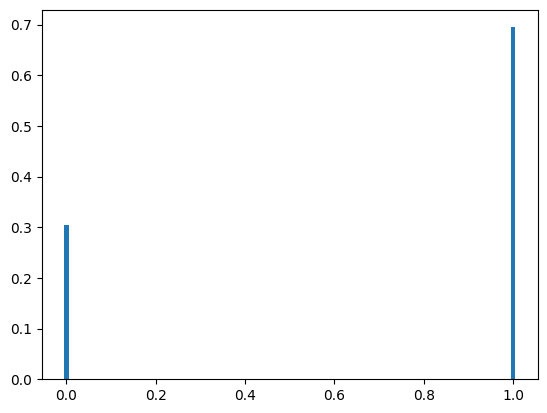

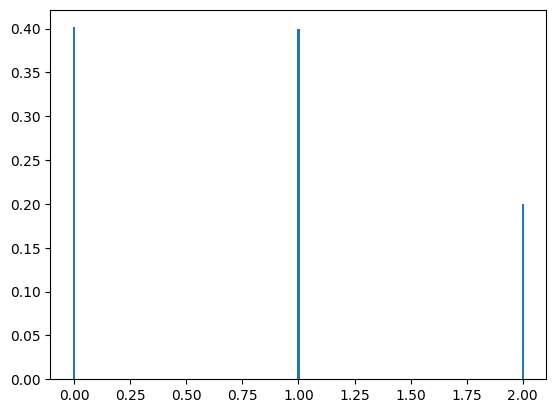

In [96]:
N = 10000
X = np.random.choice(2, N, p = [0.3,0.7]) 
Y = np.random.choice(3, N, p = [0.4,0.4,0.2])
joint = make_joint_dist(2,3,X,Y)

# we can recover and plot the discrete distributions
# from the marginals
x_marg = np.sum(joint,axis=1)
y_marg = np.sum(joint,axis=0)
plt.bar([0,1],x_marg, width=0.01)
plt.figure()
plt.bar([0,1,2],y_marg, width=0.01)

In [103]:
# Are the variables independent?
print(joint)
px = np.sum(joint,axis=1)
py = np.sum(joint,axis=0)
pxpy = np.outer(px,py)
#probably rounding error should be the same
print(pxpy)
print(joint)

[[0.1227 0.122  0.0607]
 [0.2787 0.2771 0.1388]]
[[0.12258756 0.12188514 0.0609273 ]
 [0.27881244 0.27721486 0.1385727 ]]
[[0.1227 0.122  0.0607]
 [0.2787 0.2771 0.1388]]


We can have continous random variables too and as a rule of thumb sums just turn into integrals e.g.
$$p(x) = \int p(x,y)dy$$
$$p(x,y) = p(y|x)p(x)$$
Where
$$p(y|x) = p(x,y)/p(x)$$

# Expected Values, Variance, Covariance
Given a function on a random variable we can compute the weighted average of $f$ by the probability, referred to as the expected value
$$\mathbb{E}[f] = \sum p(x)f(x)$$ 
$$\mathbb{E}[f] = \int p(x)f(x)$$ 

In [119]:
# we can think of this as a game, you randomly pick a number
# i pay you 10 times that number, the expected value tells us
# how much we should expect to win
x = np.random.choice(5,1000,p=[0.1,0.3,0.3,0.2,0.1])

probs = np.array([0.1,0.3,0.3,0.2,0.1])
outcomes = np.array([0,10,20,30,40])
exp_exact = np.sum(probs*outcomes)
exp_approx = np.mean(x*10)

# in pracice we estimate this by an average instead
print(f'E[f] = {exp_exact}')
print(f'E[f] ~ {exp_approx}')

E[f] = 19.0
E[f] ~ 19.06


We also have conditional expectations defined as
$$E_x[f|y] = \sum p(x|y)f(x)$$
The variance is defined as 
$$var[f] = \mathbb{E}[(f(x) - \mathbb{E}[f(x)])^2] = \mathbb{E}[f(x)^2] - \mathbb{E}[f(x)]^2$$
and measures how much $f$ varies measured from its mean.

In [129]:
var_exact = np.sum(probs*(outcomes-exp_exact)**2)
var_exact2 = np.sum(probs*(outcomes**2)) - exp_exact**2
var_approx = np.mean(x**2*100) - (np.mean(x*10))**2
print(var_exact,var_exact2,var_approx)



129.0 129.0 131.71640000000002


We can also capture the (linear) dependence of random variables with covariance
$$cov[x,y] = \mathbb{E}[xy] - \mathbb{E}[x][y]$$
if $x,y$ are vectors then we get a matrix

In [137]:
x = np.random.choice(5,1000)
y = 1*x
#highly correlated
print(f'cor[x,y] = {np.mean(x*y) - np.mean(x)*np.mean(y)}')
#not correlated different probabilities
y2 = np.random.choice(5,1000,p=[0.1,0.3,0.3,0.1,0.2])
print(f'cor[x,y] = {np.mean(x*y2) - np.mean(x)*np.mean(y2)}')

# two variables which correlate perfectly negatively
x = np.array([[0, 2], [1, 1], [2, 0]]).T
# the ijth entry is how much variable x_i correlates with x_j
np.cov(x)

cor[x,y] = 1.9749759999999998
cor[x,y] = -0.044184000000000445


array([[ 1., -1.],
       [-1.,  1.]])

# Maximum Likelihood estimation

Let $X$ be a dataset of i.i.d variables dependent on variables $\theta$ then we can write the probability of the observed data as
$$p(X|\theta) = \prod p(x_i|\theta)$$
This is the likelihood function. Maximum likelihood estimation seeks to find the parameters which maximize the likelihood of the data. This is done by taking the gradient of the log likelihood and analytically or numerically solving. For basic distributions the setting of the parameters are usually the intuitive ones. For a gaussian distribution and $N$ data points we find that
$$\mu = 1/N \sum x_i$$
$$\sigma^2 = 1/N \sum (x_i - \mu)$$

The weakness of this method is already apparent since it turns out that even though we can solve for sigma exactly its a biased estimate.

Mean est: 1.996124458463215
Biased sigma est: 1.4630043055458177
Unbiased sigma est: 1.464468774320138


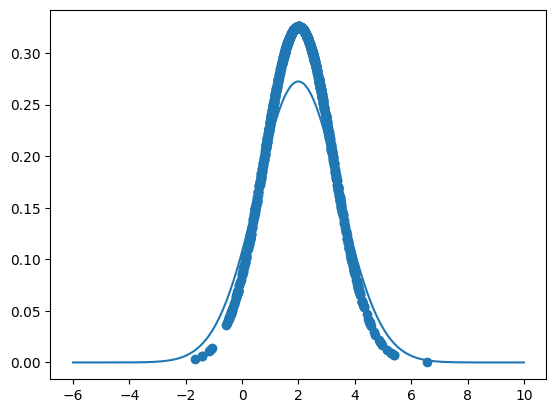

In [224]:
mu = 2.0
sigma = np.sqrt(1.5)
N = 1000
xs = np.linspace(-6,10,N)
data = np.random.normal(loc=mu,scale=sigma,size=N)

def normal(xs,m,s):
    coef = 1/(2*np.pi*s**2)**0.5
    return coef*np.exp(-0.5*(xs-m)**2*(1/s**2))
    
mu_est = np.mean(data)
print(f'Mean est: {mu_est}')
# biased estiate but not that bad
sigma_est = np.var(data)
print(f'Biased sigma est: {sigma_est}')
sigma_est = sigma_est * (N/(N-1))
print(f'Unbiased sigma est: {sigma_est}')


fitted_dist = normal(xs,mu_est,sigma_est)
plt.plot(xs,fitted_dist)
plt.scatter(data,normal(data,mu,sigma))

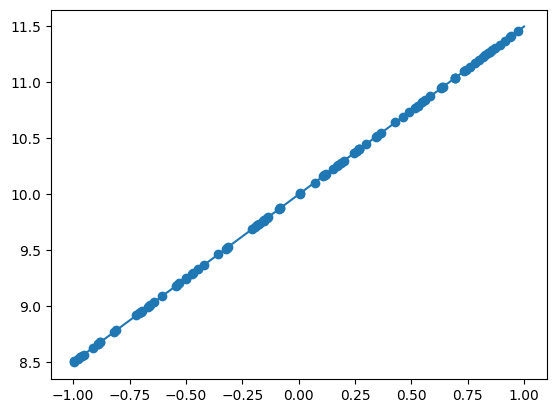

In [239]:
m = 1.5
b = 10.
N = 1000
x = np.linspace(-1,1,N)
y = m*x+b


subsample_size = 100
subsample = np.random.choice(N,subsample_size)

xs, data = x[subsample], y[subsample]
plt.plot(x,y)
plt.scatter(xs,data)

Assume that we have a dataset of $N$ pairs of $x_i,t_i$ and the model is $y_w(x) = w_0 + w_1x + .. + w_nx^n$. Assume we have a least squares loss
$$E(w) = 1/2 \sum_{i=1}^N (y_w(x) - t_i)^2$$
Then to minimize $E$ we take the gradient and set to zero, the gradients are easy to find and then we will have a linear system in $w$ that we can solve numerically.
$$\frac{\partial E}{\partial w_0} = Nw_0 + (x_1 + .. + x_n)w_1 + ... (x_1^n + ... + x_n^n)w_n - (t_1 + .. + t_n)$$
$$\frac{\partial E}{\partial w_1} = (x_1 + .. + x_n)w_0 + (x_1^{2} + .. + x_n^{2})w_1 + ... (x_1^{n+1} + ... + x_n^{n+1})w_n - (x_1t_1 + .. x_nt_n)$$
$$\frac{\partial E}{\partial w_n} = (x_1^n + .. + x_n^n)w_0 + (x_1^{n+1} + .. + x_n^{n+1})w_1 + ... (x_1^{2n} + ... + x_n^{2n})w_n - (x_1^{n}t_1 + .. x_n^n t_n)$$

The system is then
$$\begin{bmatrix}
N & (x_1 + .. + x_n) & ... & (x_1^n + ... + x_n^n)\\
x_1 + .. + x_n & (x_1^{2} + .. + x_n^{2}) & ... & (x_1^{n+1} + ... + x_n^{n+1})\\
(x_1^n + .. + x_n^n) & (x_1^{n+1} + .. + x_n^{n+1}) & ... & (x_1^{2n} + ... + x_n^{2n})\\
\end{bmatrix} = \begin{bmatrix} t_1 + .. + t_n \\ x_1t_1 + .. x_nt_n  ... \\ (x_1^{n}t_1 + .. x_n^n t_n)\end{bmatrix}$$

In [339]:
def get_weights(x,t,d):
    # degree of polynomial so bump up one
    d = d+1
    A = np.zeros((d,d))
    b = np.zeros(d)
    for i in range(d):
        for j in range(d):
            A[i,j] = np.sum(x**(i+j))
    for i in range(d):
        b[i] = np.dot(x**i,t)
    return np.linalg.solve(A,b)

In [338]:
def get_weights_fast(x,t,d):
    d = d+1
    # broad casting trick
    # makes into shape d x d x n
    # [1 2 3]
    # [[[0] [1] [2]]] -> [[1 1 1],[1,2,3],[1,4,9]]
    A = np.indices((d,d)).sum(axis=0).reshape((d,d,1))
    A = np.power(x,A).sum(axis=-1)
    b = np.arange(d).reshape(d,1)
    b = np.power(x,b)
    b = b@t
    return np.linalg.solve(A,b)

In [378]:
N = 100
d = 10
x_train = np.linspace(-1,1,N)
t_train = np.sin(x_test)

In [379]:
%%time
_ = get_weights(x_train,t_train,d)

CPU times: total: 15.6 ms
Wall time: 2 ms


In [380]:
%%time
w = get_weights_fast(x_train,t_train,d)

CPU times: total: 0 ns
Wall time: 1 ms


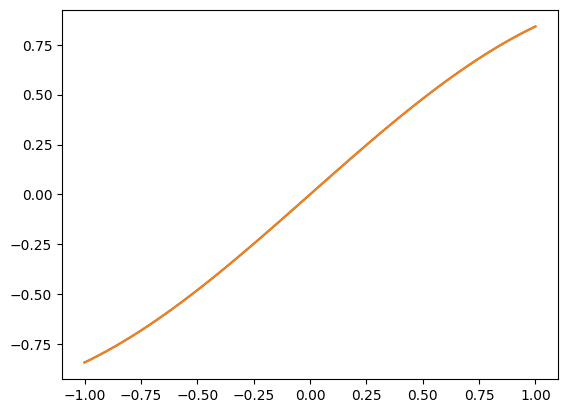

In [382]:
# with high degree polynomial we should be able to overfit exactly
p = np.arange(d+1).reshape(d+1,1)
y = (x_train**p).T@w
plt.plot(x_train,y)
plt.plot(x_train,t_train)

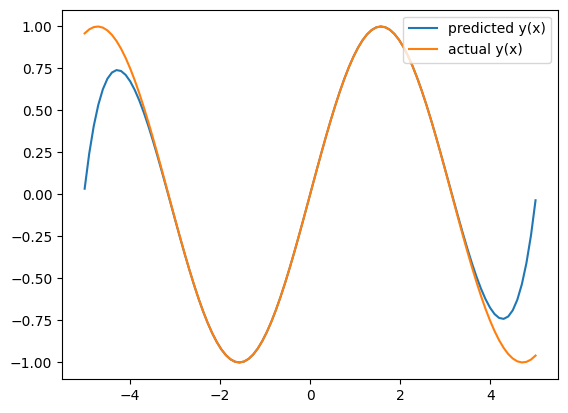

In [388]:
x_test = np.linspace(-5,5,N)
t_test = np.sin(x_test)

# we start to diverge the further we get from the training data
p = np.arange(d+1).reshape(d+1,1)
y = (x_test**p).T@w
plt.plot(x_test,y,label="predicted y(x)")
plt.plot(x_test,t_test,label="actual y(x)")
plt.legend()

As the book discusses we can incorporate noise into the model by assuming its gaussian
$$p(t|x,w,\beta) = N(t|y(x,w),\beta^{-1})$$
It turns out the MLE for $w$ is the same and for 
$$\beta^{-1} = \frac{1}{N} \sum (y(x_n , w) - t_n)^2$$
Now when new data comes in at test we instead have a Normal distribution that lets us put guess on where the point could be.

0.08833154460063948


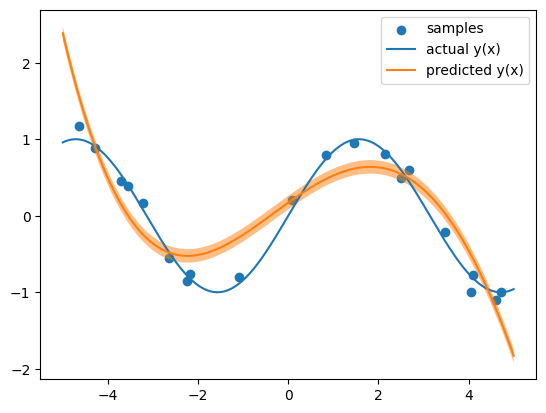

In [453]:
np.random.seed(1)
N = 1000
sample_size = 20
d = 4

x = np.linspace(-5,5,N)
t = np.sin(x)

samples = np.random.choice(N,sample_size)
x_sample,t_sample = x[samples],t[samples]+np.random.normal(loc=0.0,scale=0.1,size=sample_size)

w = get_weights_fast(x_sample,t_sample,d)
p = np.arange(d+1).reshape(d+1,1)
y_preds = (x_sample**p).T@w
y_est = (x**p).T@w
beta = np.mean((y_preds-t_sample)**2)
print(beta)

fig, ax = plt.subplots()
ax.scatter(x_sample,t_sample,label="samples")
ax.plot(x,t,label="actual y(x)")
ax.fill_between(x, y_est - beta, y_est + beta, alpha=0.5)
ax.plot(x,y_est,label="predicted y(x)")


ax.legend()

Now we can interpret the orange curve as plotting the mean of the gaussian at every point and the band around it as $\pm 1$ standard deviation given by beta

In [458]:
N = 1000
p = 0.3
b = np.random.choice(2,N,p=[0.3,0.7])
print(f"MLE for p = {np.mean(b==1)}")

MLE for p = 0.696


MLE for p = 0.70004


(array([0.00033333, 0.00177778, 0.01066667, 0.04055556, 0.11466667,
        0.22255556, 0.29588889, 0.25566667, 0.13511111, 0.03388889]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

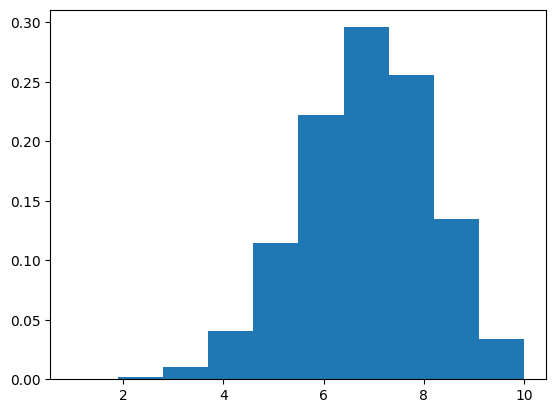

In [482]:
trials = 10
p = 0.7
N = 10000
binom = np.random.binomial(trials,p,N)
s = binom.sum()
nk = trials*N
print(f"MLE for p = {s/nk}")
plt.hist(binom,density=True)

In [46]:
from scipy.special import gamma
from scipy.special import comb
np.random.seed(0)
def beta(m,a,b):
    return gamma(a+b)/gamma(a)*gamma(b) * m**(a-1)*(1-m)**(b-1)

def p(m,d,trials=1):
    s = 0.0
    for c in d:
        s += np.log(comb(trials,c)*m**c*(1-m)**(trials-c) + 0.001)
    return -s

def posterior(mu,a,b,m,l):
    return gamma(m+a+b+l)/(gamma(m+a)*gamma(b+l)) * mu**(m+a-1)*(1-mu)**(l+b-1)

num_heads = 1
num_tails = 0
xs = np.linspace(0,1)
bin = np.random.binomial(1,0.5)
print(bin)
a,b = 2,2
plt.plot(xs,beta(xs,a,b))
plt.plot(xs,p(xs,num_heads))
plt.plot(xs,posterior(xs,a,b,num_heads,num_tails))

plt.figure()

plt.plot(xs,beta(xs,a,b))
plt.plot(xs,p(xs,num_heads)*p(xs,num_heads))
plt.plot(xs,posterior(xs,a,b,num_heads+1,num_tails))

1


TypeError: 'int' object is not iterable

In [48]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)
# create a figure and axes
fig = plt.figure(figsize=(12,5))
ax1 = plt.subplot(1,3,1)   
ax2 = plt.subplot(1,3,2)
ax3 = plt.subplot(1,3,3)

# set up the subplots as needed
ax1.set_xlim(( 0, 1))
ax1.set_ylim((0,2))
ax1.set_xlabel('$\mu$')
ax1.set_title('Prior')

ax2.set_xlim((0,1))
ax2.set_ylim((0,20))
ax2.set_xlabel('$P(D|\mu)$')
ax2.set_title('Likelihood')

ax3.set_xlim((0,1))
ax3.set_ylim((0,20))
ax3.set_xlabel('$P(\mu|m,l,a,b)$')
ax3.set_title('Posterior')

# create objects that will change in the animation. These are
# initially empty, and will be given new values for each frame
# in the animation.
curve1, = ax1.plot([], [], 'b', lw=2)     # ax.plot returns a list of 2D line objects
curve2, = ax2.plot([], [], 'r', lw=2)
curve3, = ax3.plot([], [], 'y', lw=2)

N = 10
bin = np.random.binomial(1,0.7,N)
def draw(n):
    xs = np.linspace(0,1)
    a,b = 2,2
    num_heads = np.sum(bin[:(n+1)])
    num_tails = np.sum(bin[:(n+1)]==0)
    #print(f"N = {n}, heads = {num_heads}, tails = {num_tails}")
    curve1.set_data(xs,beta(xs,a,b))
    #print(p(xs,bin[:n+1]))
    curve2.set_data(xs,p(xs,bin[:n+1]))
    curve3.set_data(xs,posterior(xs,a,b,num_heads,num_tails))
    return (curve1,curve2,curve3)

from matplotlib import animation

# blit=True re-draws only the parts that have changed.
anim = animation.FuncAnimation(fig, draw, frames=N, interval=500, blit=True)

from IPython.display import HTML
HTML(anim.to_html5_video())

In [88]:
N = 100000
cat = 6
mult = np.zeros((N,cat))
c = np.random.choice(cat,N,p=[1/6]*6)
mult[np.arange(N),c] = 1
#100 x 6 -> 100 x 6 -> 6
print(1/6)
#print(mult)
mle_est = np.mean(mult,axis=0)
print(mle_est)

0.16666666666666666
[0.16647 0.16582 0.16597 0.16553 0.1687  0.16751]
